# INTRODUCTION

School dropout and educational failure pose significant challenges to economic growth and societal well-being, directly impacting students, families, institutions, and the broader community. According to the **Education Data Initiative**, around **40% of undergraduate students** drop out before completing their degree. College dropouts face more financial challenges, earning an average of **35% less income** and experiencing a **20% higher unemployment rate** compared to their peers who graduate.

## Research Question:
1. **What factors contribute to student dropout or success, and how do they impact it?**

## Data

The dataset contains **4,424 records** with **35 attributes**, where each record represents an individual student. It includes information available at the time of student enrollment, along with demographic, socioeconomic, and macroeconomic data, as well as the students’ academic performance at the end of the first and second semesters.

- **Data Source:**  
Valentim Realinho, Jorge Machado, Luís Baptista, and Mónica V. Martins. *“Predict Students' Dropout and Academic Success”*. Zenodo, December 13, 2021. [https://doi.org/10.5281/zenodo.5777340](https://doi.org/10.5281/zenodo.5777340).

- **Data Description:**  
Realinho, Valentim, Jorge Machado, Luís Baptista, and Mónica V. Martins. 2022. *"Predicting Student Dropout and Academic Success"* Data 7, no. 11: 146. [https://doi.org/10.3390/data7110146](https://doi.org/10.3390/data7110146)


In [35]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
students = pd.read_csv('../data/dataset.csv')
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# DATA CLEANING

This dataset is nearly clean thanks to the rigorous data preprocessing performed by the contributors of the data [Reference](https://www.mdpi.com/2306-5729/7/11/146). They've addressed anomalies, outliers, and missing values.

However, a few minor cleaning steps are still needed. First, modify some column names to make them more consistent and easier to work with later.

In [36]:
# Correct a column name that has a typo 
students.rename(columns={"Nacionality" : "Nationality",
                         "Mother's qualification" : "Mother_qualification",
                         "Father's qualification" : "Father_qualification",
                         "Mother's occupation" : "Mother_occupation",
                         "Father's occupation" : "Father_occupation",
                         "Age at enrollment" : "Age"}, inplace=True)

# Replace white space in column names with underscore
students.columns = students.columns.str.replace(' ', '_')

# Remove parenthesis
students.columns = students.columns.str.replace('(', '')
students.columns = students.columns.str.replace(')', '')
    

Change the data types of columns that should be categorical from ‘int’ to ‘category’ to ensure that classification models treat these columns as categorical data rather than numerical.

In [37]:
# Change data types of columns that should be categorical
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

students[col] = students[col].astype('category')

Text(0.5, 1.0, 'Proportion of Labels')

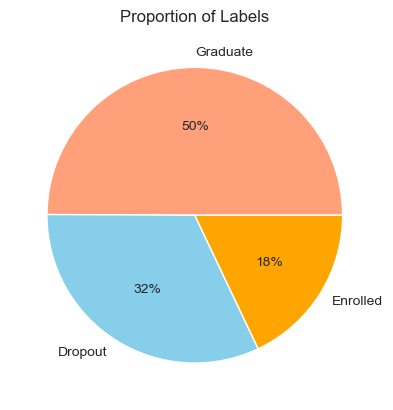

In [38]:
labels = students['Target'].value_counts().index
values = students['Target'].value_counts().values

plt.pie(values, labels=labels, colors=['lightsalmon', 'skyblue', 'orange'], autopct = '%1.0f%%')
plt.title('Proportion of Labels')

# DESCRIPTIVE ANALYSIS

This section presents the basic statistical information of the attributes. The attributes are grouped as they are in the [research of Realinho et al](https://www.mdpi.com/2306-5729/7/11/146). 

To execute this analysis, the following functions below are used. The attributes are basically divided between categorical and numerical types.

In [39]:
# Functions for basic statistics including percentiles and visualizations
def get_basic_stat_categorical(col_name):
    attribute = students[col_name]

    # Check if the attribute is categorical
    if isinstance(attribute.dtype, pd.CategoricalDtype):
        # For categorical columns, print frequency counts
        print(f'Counts of {col_name}:')
        print(attribute.value_counts())

        # Bar plot for categorical data
        plt.figure(figsize=(12, 6))
        sns.countplot(x=col_name, data=students)
        plt.title(f'Distribution of {col_name}')
        plt.xticks(rotation=45)  # Rotate the x labels for better readability
        plt.show()
    else:
        print(f'The column "{col_name}" is not categorical.')
        
def get_basic_stat_numerical(col_name):
    attribute = students[col_name]
    
    # Check if the attribute is numerical
    if pd.api.types.is_numeric_dtype(attribute):
        # Print basic statistics for numeric columns
        print(f'Mean: {attribute.mean()}')
        print(f'Median: {attribute.median()}')
        print(f'Mode: {attribute.mode()[0]}')
        print(f'σ: {attribute.std()}')
        print(f'Min: {attribute.min()}')
        print(f'Max: {attribute.max()}')
        
        # Print percentiles (25th, 50th, and 75th percentiles)
        print(f'25th percentile: {attribute.quantile(0.25)}')
        print(f'50th percentile (Median): {attribute.quantile(0.50)}')
        print(f'75th percentile: {attribute.quantile(0.75)}')
        
        # Create subplots for box plot and histogram
        plt.figure(figsize=(12, 6))

        # Box plot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
        sns.boxplot(x=attribute)
        plt.title(f'Box Plot of {col_name}')

        # Histogram
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
        sns.histplot(attribute, bins=20, kde=True)
        plt.title(f'Histogram of {col_name}')

        plt.tight_layout()  # Adjusts subplots to fit into figure area.
        plt.show()
    else:
        print(f'The column "{col_name}" is not numerical.')

def get_basic_statistics(col_name):
    attribute = students[col_name]
    title = col_name.replace('_', ' ').upper()
    print(f'BASIC STATISTICS OF {title}')
    
    if isinstance(attribute.dtype, pd.CategoricalDtype):
        get_basic_stat_categorical(col_name)
    elif pd.api.types.is_numeric_dtype(attribute):
        get_basic_stat_numerical(col_name)
    else:
        print(f'{col_name} is neither categorical nor numeric.')


## Descriptive analysis about demographic data

This includes marital status, nationality, displaced, gender, age at enrollment, and international attributes.

BASIC STATISTICS OF MARITAL STATUS
Counts of Marital_status:
Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


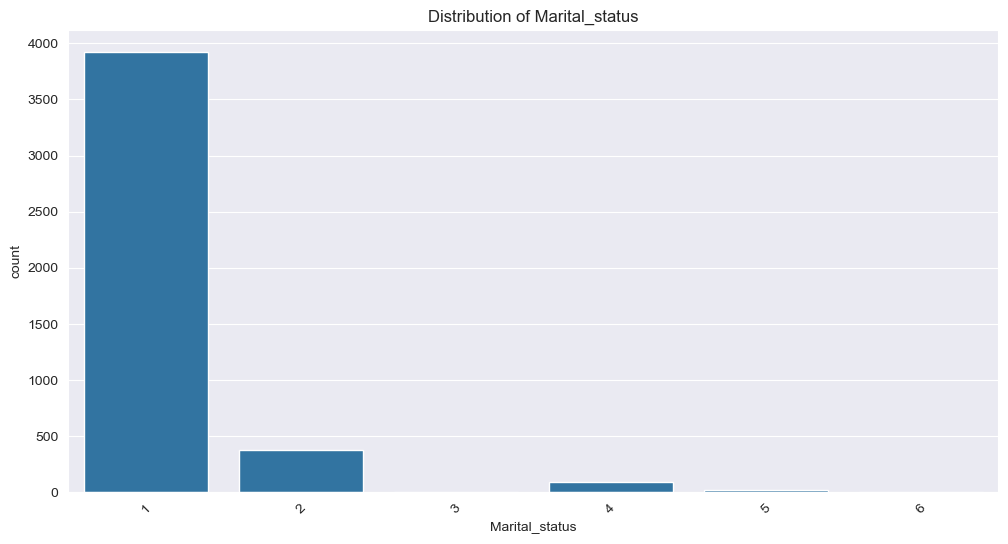

BASIC STATISTICS OF NATIONALITY
Counts of Nationality:
Nationality
1     4314
14      38
12      14
3       13
9       13
10       5
4        3
18       3
16       3
19       2
17       2
15       2
11       2
2        2
8        2
13       1
7        1
6        1
5        1
20       1
21       1
Name: count, dtype: int64


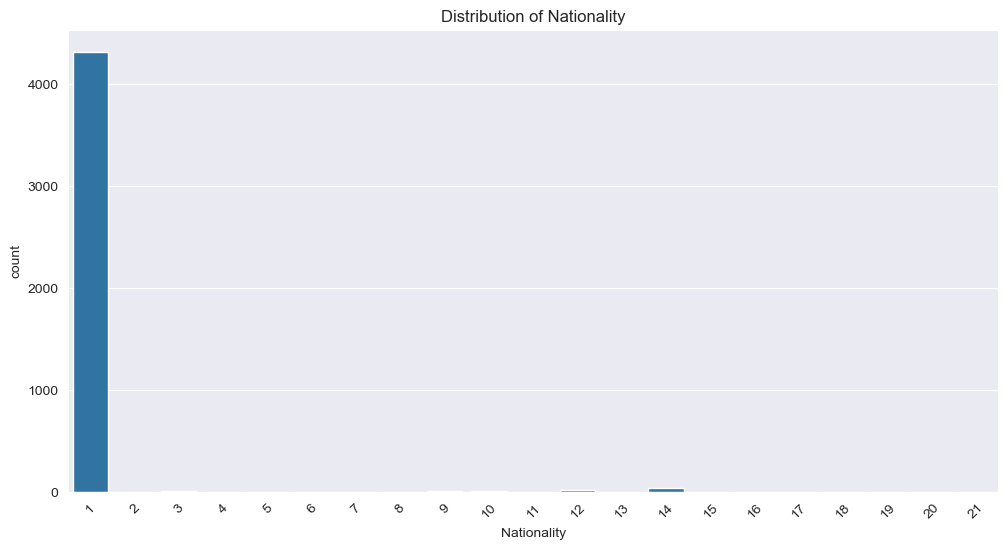

BASIC STATISTICS OF DISPLACED
Counts of Displaced:
Displaced
1    2426
0    1998
Name: count, dtype: int64


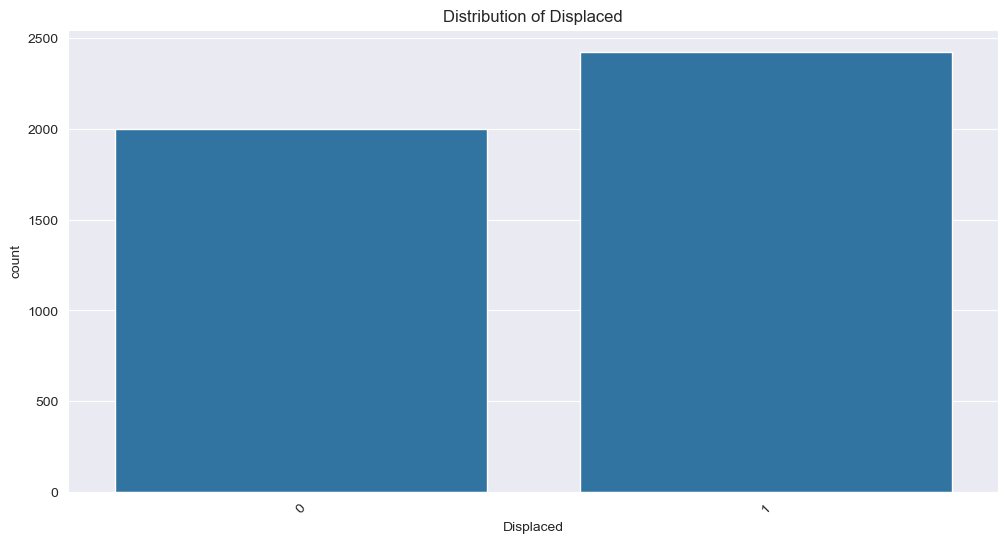

BASIC STATISTICS OF GENDER
Counts of Gender:
Gender
0    2868
1    1556
Name: count, dtype: int64


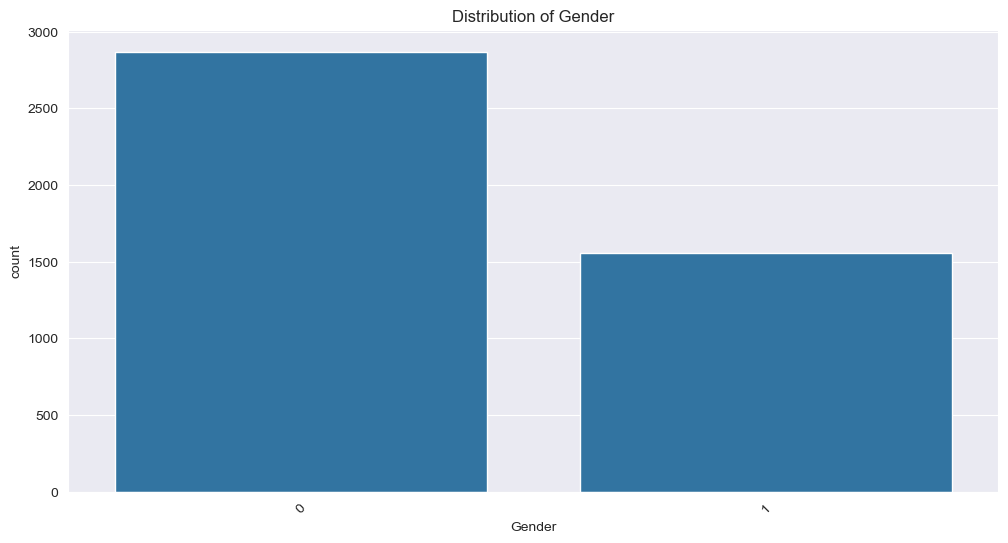

BASIC STATISTICS OF AGE
Mean: 23.265144665461122
Median: 20.0
Mode: 18
σ: 7.587815615029819
Min: 17
Max: 70
25th percentile: 19.0
50th percentile (Median): 20.0
75th percentile: 25.0


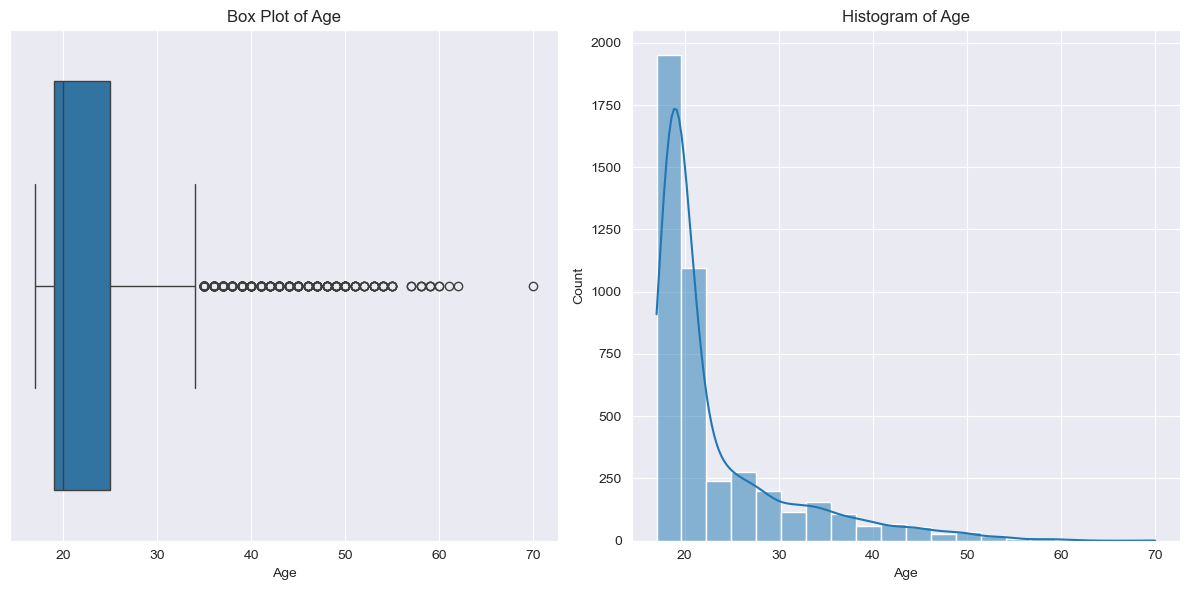

BASIC STATISTICS OF INTERNATIONAL
Counts of International:
International
0    4314
1     110
Name: count, dtype: int64


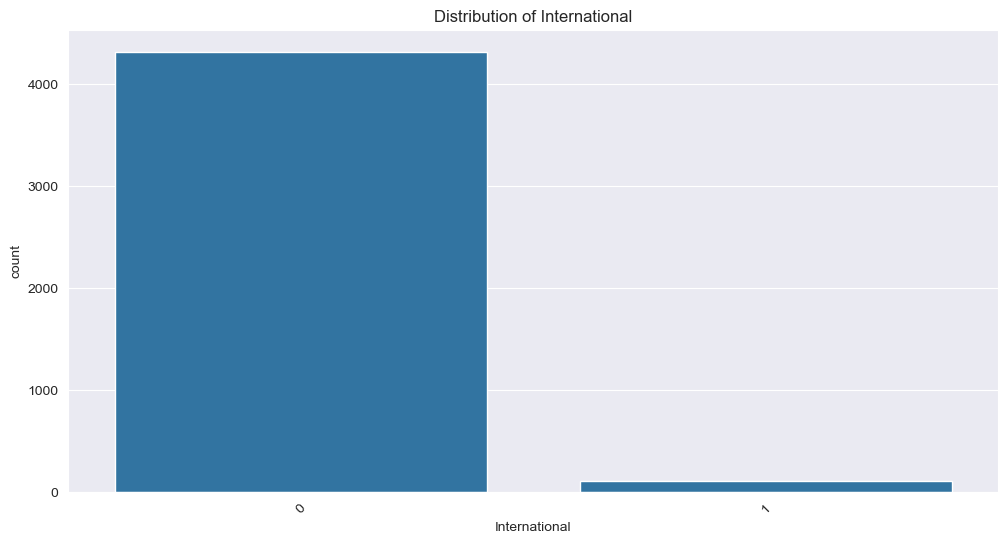

In [40]:
# List the demographic columns
column_list = ['Marital_status', 'Nationality', 'Displaced', 'Gender', 'Age', 'International']

for column in column_list:
    get_basic_statistics(column)

## Descriptive analysis about socioeconomic data

This includes parent qualifications, parent occupation, educational special needs, debtor, tuition fees, and scholarship holder attributes.

BASIC STATISTICS OF FATHER QUALIFICATION
Counts of Father_qualification:
Father_qualification
27    1209
14     968
1      904
28     702
3      282
24     112
2       68
4       39
10      38
29      20
5       18
9       10
26       8
7        5
30       5
21       4
12       4
16       4
20       3
31       2
33       2
25       2
18       2
8        2
6        2
23       1
22       1
19       1
17       1
15       1
13       1
11       1
32       1
34       1
Name: count, dtype: int64


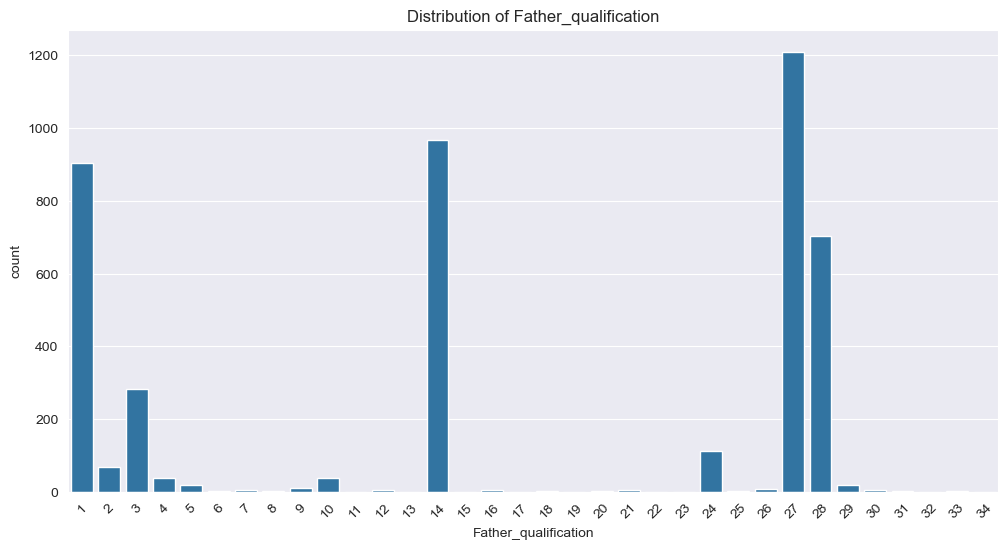

BASIC STATISTICS OF MOTHER QUALIFICATION
Counts of Mother_qualification:
Mother_qualification
1     1069
22    1009
13     953
23     562
3      438
19     130
2       83
4       49
10      42
5       21
25       9
24       8
7        8
26       6
28       4
6        4
27       4
9        3
17       3
18       3
8        3
20       3
21       3
11       2
15       1
16       1
14       1
12       1
29       1
Name: count, dtype: int64


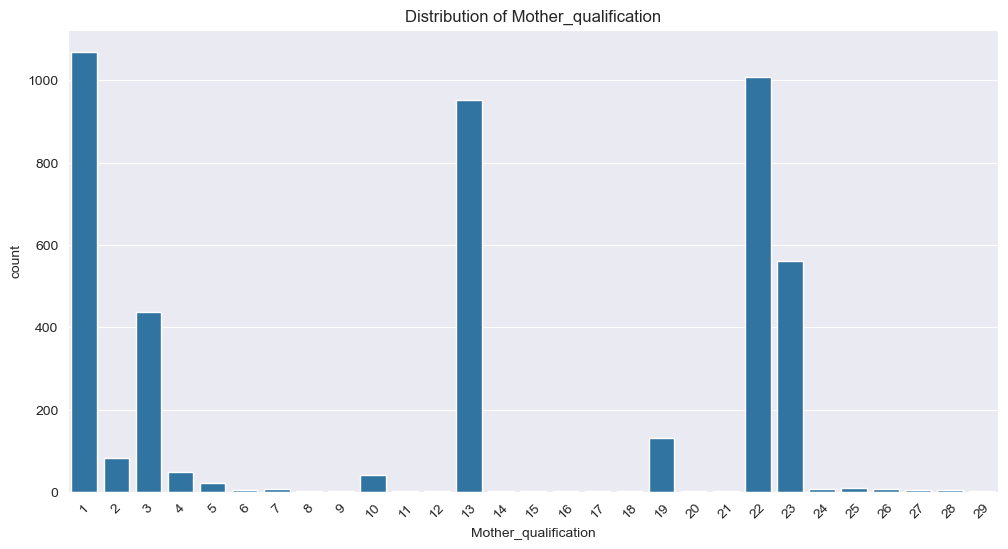

BASIC STATISTICS OF FATHER OCCUPATION
Counts of Father_occupation:
Father_occupation
10    1010
8      666
6      516
5      386
4      384
9      318
11     266
7      242
3      197
2      134
1      128
12      65
13      19
44      15
29       8
36       8
43       6
35       5
16       4
39       4
31       3
26       3
40       3
42       3
21       3
15       2
41       2
45       2
30       2
20       2
37       2
17       2
38       1
24       1
34       1
33       1
32       1
28       1
27       1
25       1
23       1
22       1
19       1
18       1
14       1
46       1
Name: count, dtype: int64


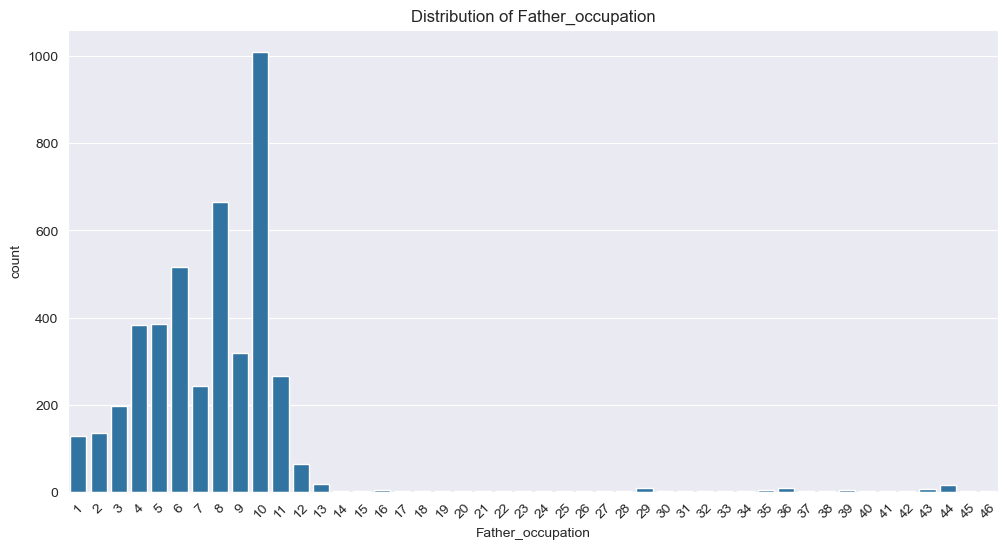

BASIC STATISTICS OF MOTHER OCCUPATION
Counts of Mother_occupation:
Mother_occupation
10    1577
5      817
6      530
4      351
3      318
8      272
1      144
2      102
7       91
12      70
9       36
29      26
13      17
32      11
20       8
15       7
22       6
28       5
30       5
31       4
19       4
11       4
18       3
21       3
23       3
24       2
25       2
14       2
27       1
26       1
16       1
17       1
Name: count, dtype: int64


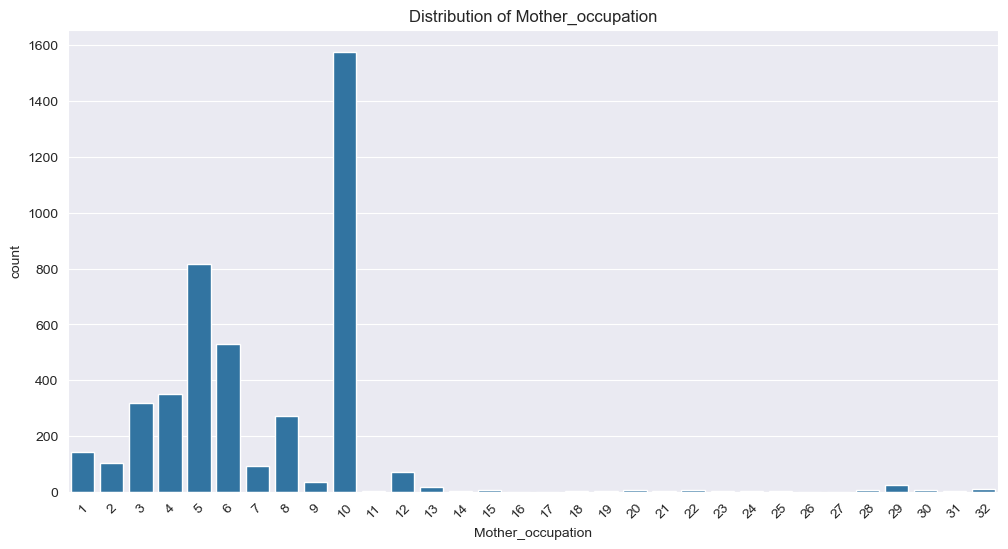

BASIC STATISTICS OF EDUCATIONAL SPECIAL NEEDS
Counts of Educational_special_needs:
Educational_special_needs
0    4373
1      51
Name: count, dtype: int64


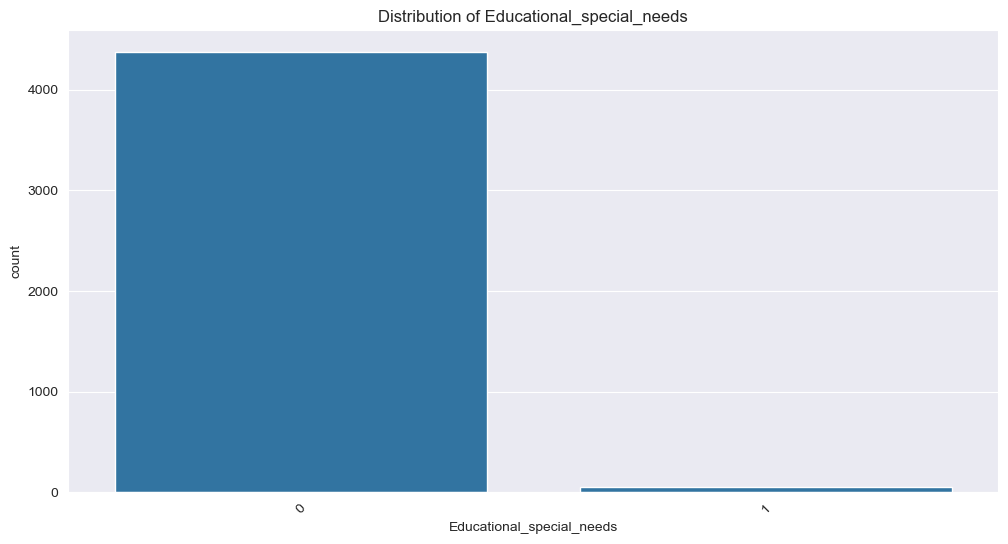

BASIC STATISTICS OF DEBTOR
Counts of Debtor:
Debtor
0    3921
1     503
Name: count, dtype: int64


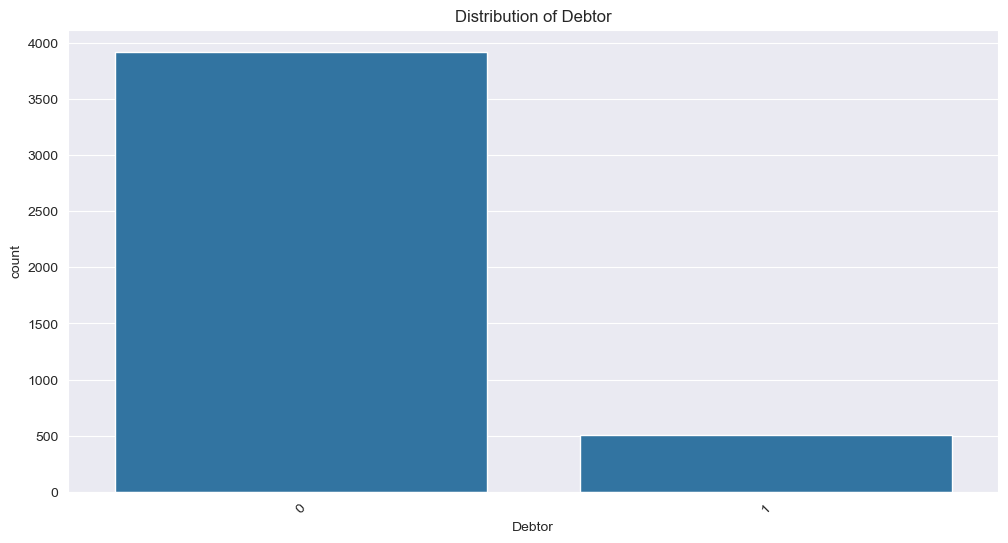

BASIC STATISTICS OF TUITION FEES UP TO DATE
Counts of Tuition_fees_up_to_date:
Tuition_fees_up_to_date
1    3896
0     528
Name: count, dtype: int64


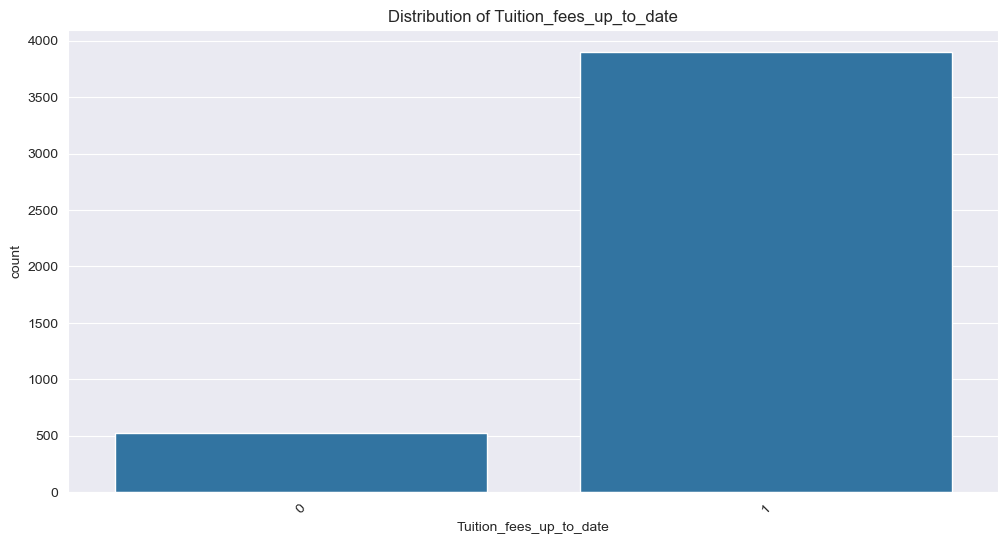

BASIC STATISTICS OF SCHOLARSHIP HOLDER
Counts of Scholarship_holder:
Scholarship_holder
0    3325
1    1099
Name: count, dtype: int64


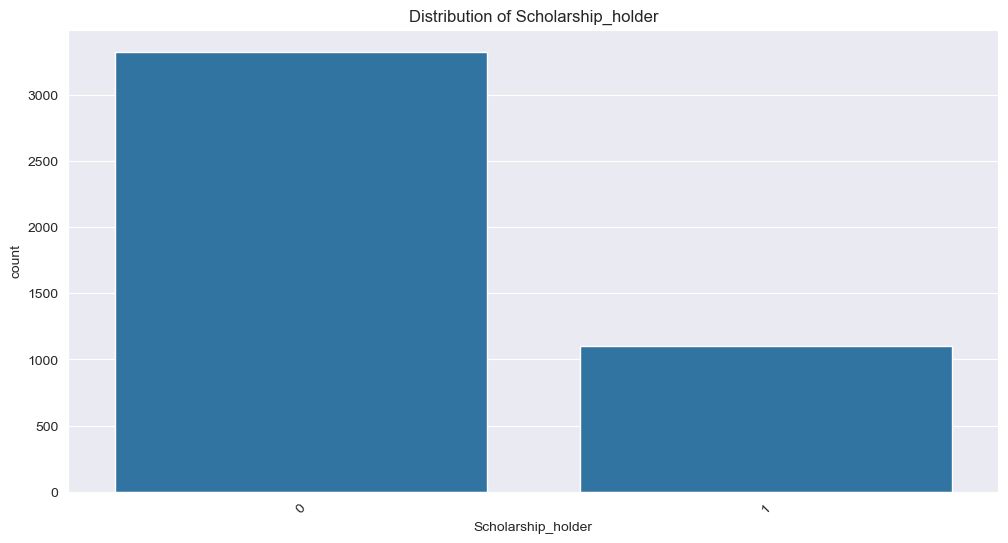

In [41]:
# List the socioeconomic columns
column_list = [
    'Father_qualification', 
    'Mother_qualification', 
    'Father_occupation',
    'Mother_occupation',
    'Educational_special_needs', 
    'Debtor',
    'Tuition_fees_up_to_date', 
    'Scholarship_holder']

for column in column_list:
    get_basic_statistics(column)

## Descriptive analysis about macroeconomic data

This includes unemployment rate, inflation rate, and GDP attributes.

BASIC STATISTICS OF UNEMPLOYMENT RATE
Mean: 11.56613924050633
Median: 11.1
Mode: 7.6
σ: 2.6638504843026367
Min: 7.6
Max: 16.2
25th percentile: 9.4
50th percentile (Median): 11.1
75th percentile: 13.9


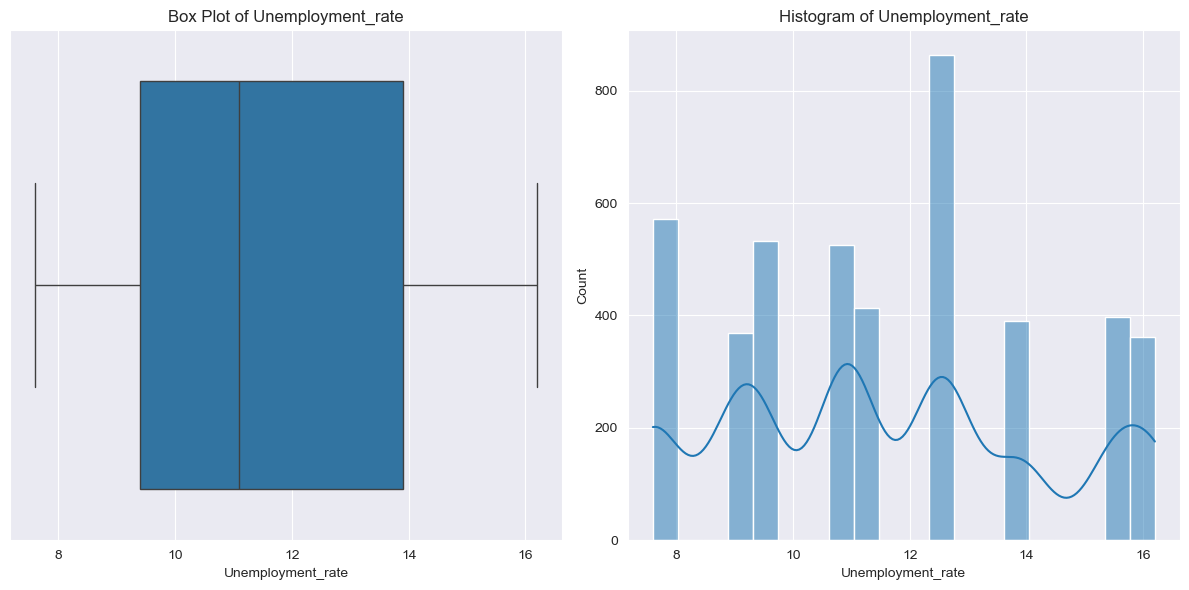

BASIC STATISTICS OF INFLATION RATE
Mean: 1.228028933092224
Median: 1.4
Mode: 1.4
σ: 1.3827106915401046
Min: -0.8
Max: 3.7
25th percentile: 0.3
50th percentile (Median): 1.4
75th percentile: 2.6


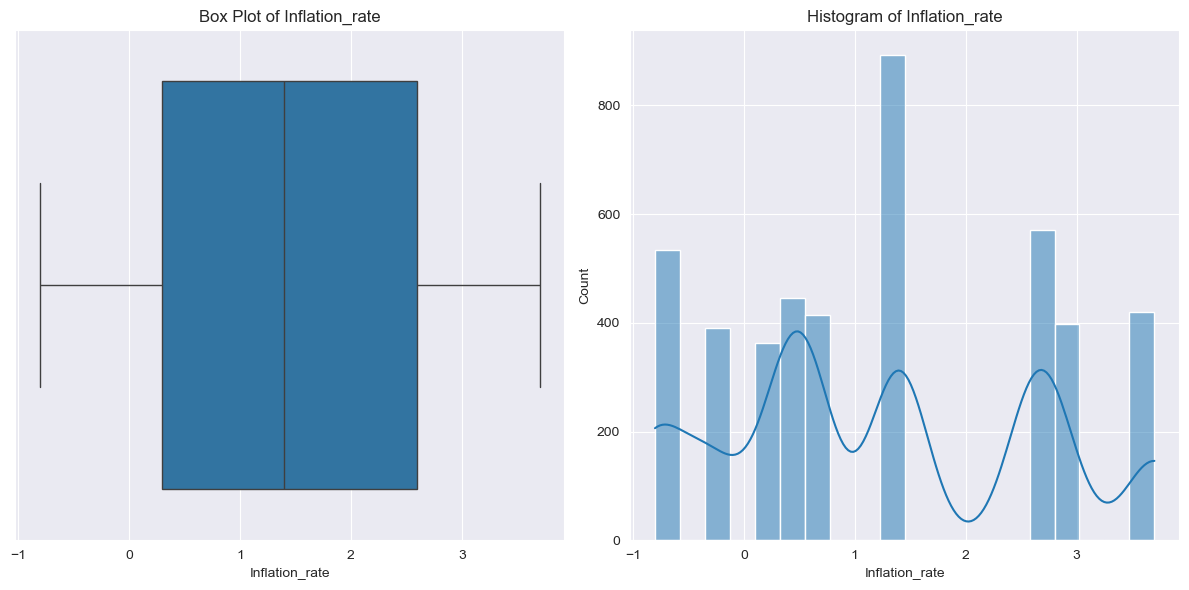

BASIC STATISTICS OF GDP
Mean: 0.001968806509945778
Median: 0.32
Mode: 0.32
σ: 2.2699354412537627
Min: -4.06
Max: 3.51
25th percentile: -1.7
50th percentile (Median): 0.32
75th percentile: 1.79


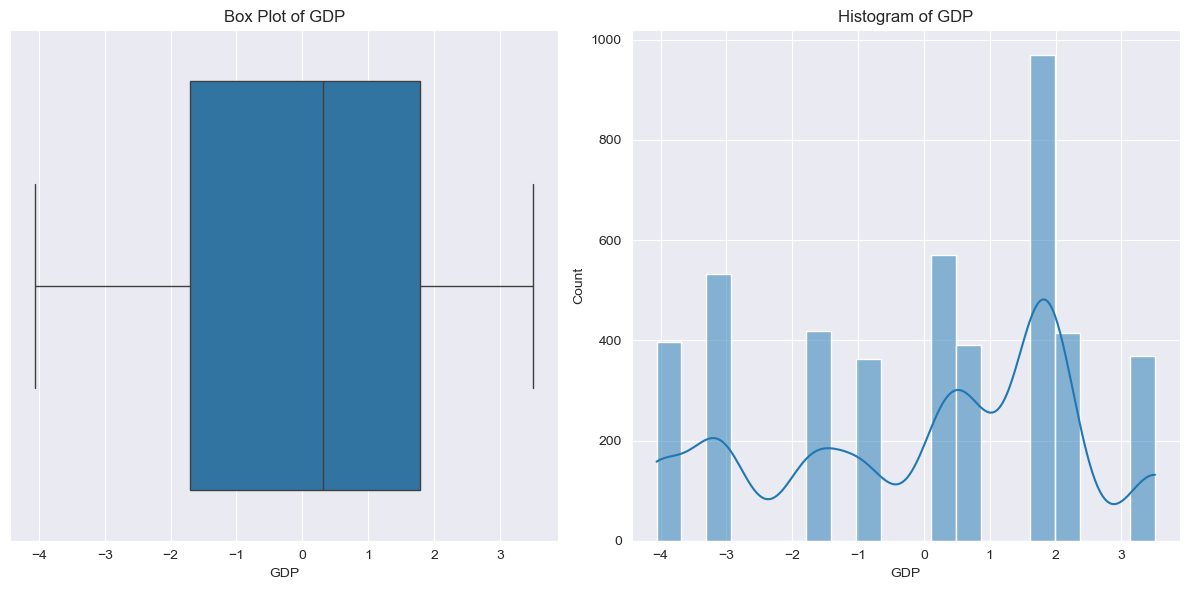

In [42]:
# List the demographic columns
column_list = [
    'Unemployment_rate', 
    'Inflation_rate', 
    'GDP',
]

for column in column_list:
    get_basic_statistics(column)

## Descriptive analysis about enrollment data

This includes application mode, application order, course, attendance, and previous qualification.

BASIC STATISTICS OF APPLICATION MODE
Counts of Application_mode:
Application_mode
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
10       1
11       1
18       1
Name: count, dtype: int64


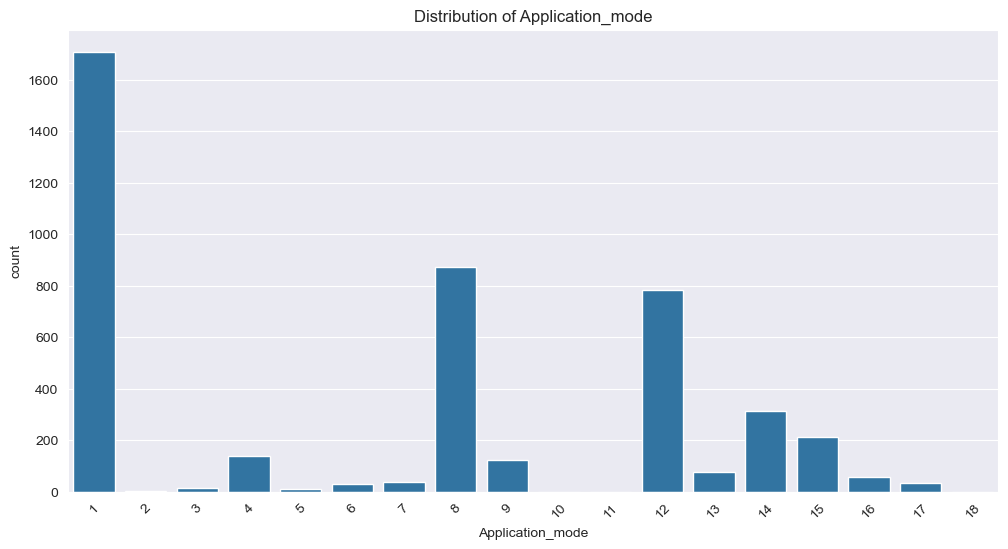

BASIC STATISTICS OF APPLICATION ORDER
Counts of Application_order:
Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: count, dtype: int64


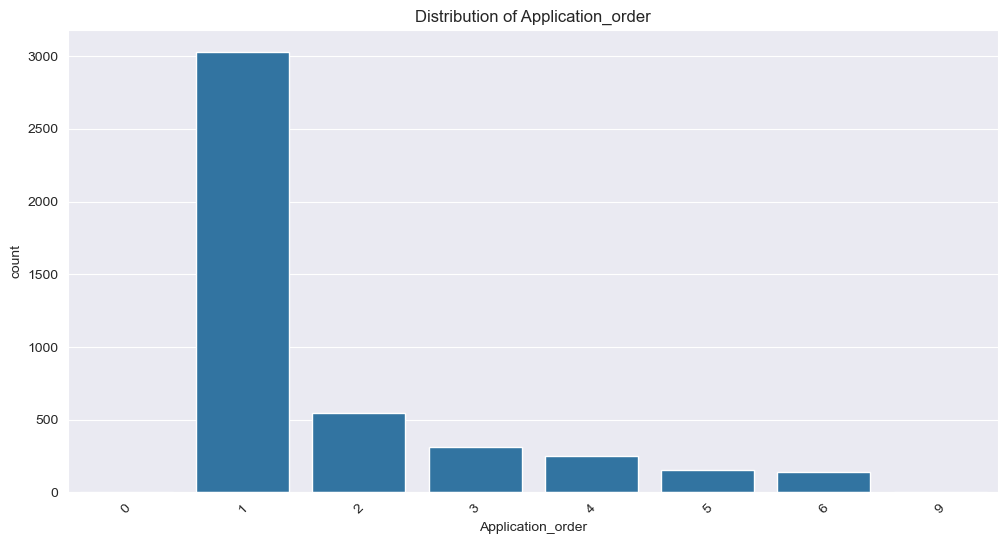

BASIC STATISTICS OF COURSE
Counts of Course:
Course
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: count, dtype: int64


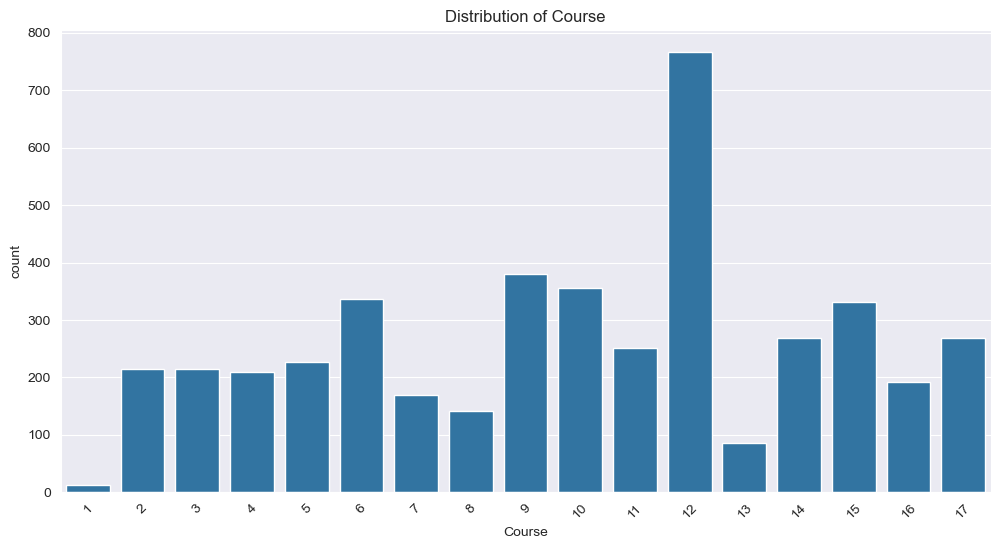

BASIC STATISTICS OF DAYTIME/EVENING ATTENDANCE
Counts of Daytime/evening_attendance:
Daytime/evening_attendance
1    3941
0     483
Name: count, dtype: int64


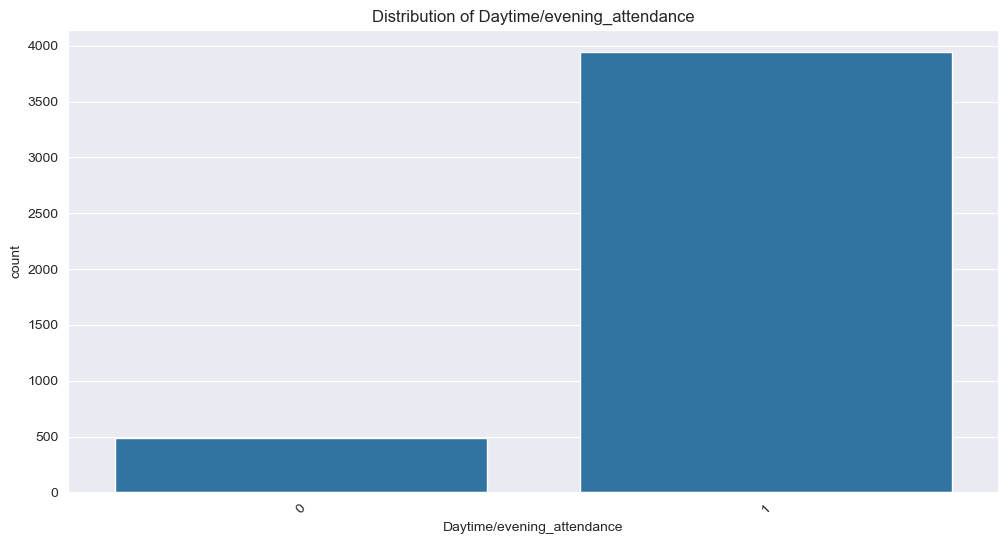

BASIC STATISTICS OF PREVIOUS QUALIFICATION
Counts of Previous_qualification:
Previous_qualification
1     3717
14     219
12     162
3      126
9       45
15      40
16      36
2       23
6       16
7       11
4        8
13       7
17       6
8        4
11       2
10       1
5        1
Name: count, dtype: int64


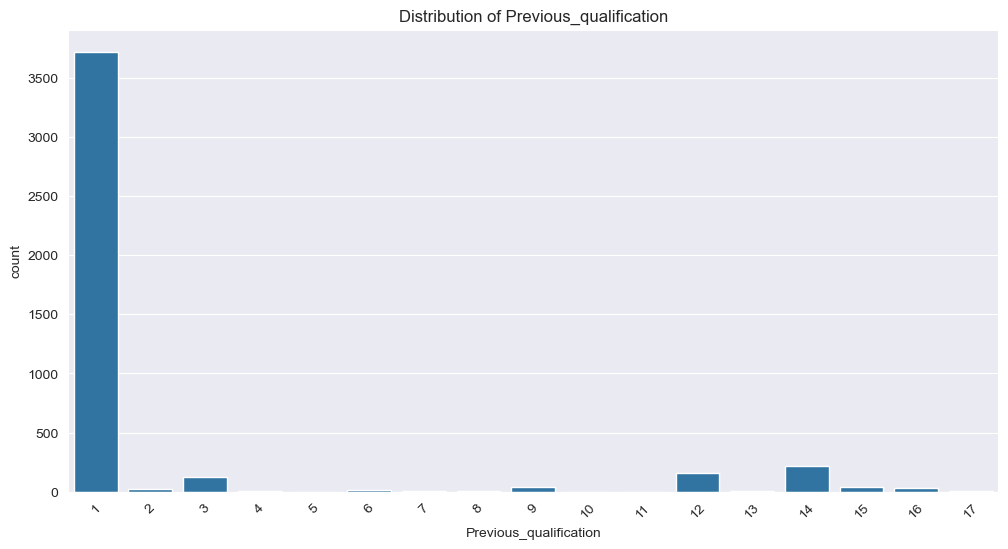

In [43]:
# List the enrollment columns
column_list = [
    'Application_mode', 
    'Application_order', 
    'Course', 
    'Daytime/evening_attendance', 
    'Previous_qualification'
]

for column in column_list:
    get_basic_statistics(column)

## Descriptive analysis about 1st semester academic data

This includes credited, enrolled, evaluated, not evaluated, approved, and grade units.

BASIC STATISTICS OF CURRICULAR UNITS 1ST SEM CREDITED
Mean: 0.7099909584086799
Median: 0.0
Mode: 0
σ: 2.3605066191181483
Min: 0
Max: 20
25th percentile: 0.0
50th percentile (Median): 0.0
75th percentile: 0.0


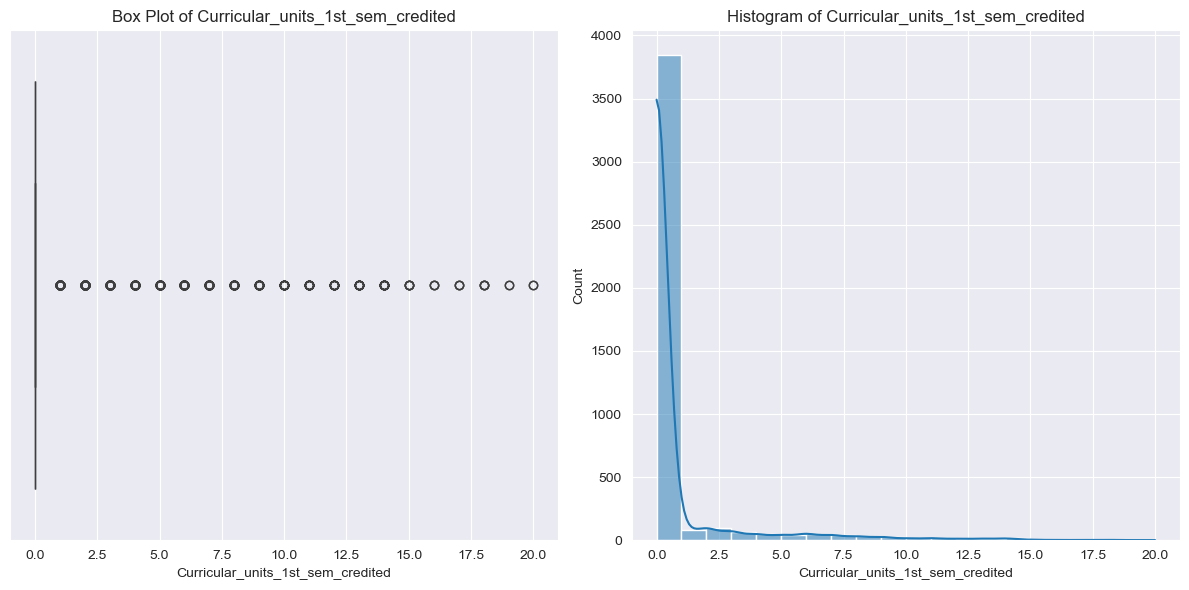

BASIC STATISTICS OF CURRICULAR UNITS 1ST SEM ENROLLED
Mean: 6.2705696202531644
Median: 6.0
Mode: 6
σ: 2.480178175307104
Min: 0
Max: 26
25th percentile: 5.0
50th percentile (Median): 6.0
75th percentile: 7.0


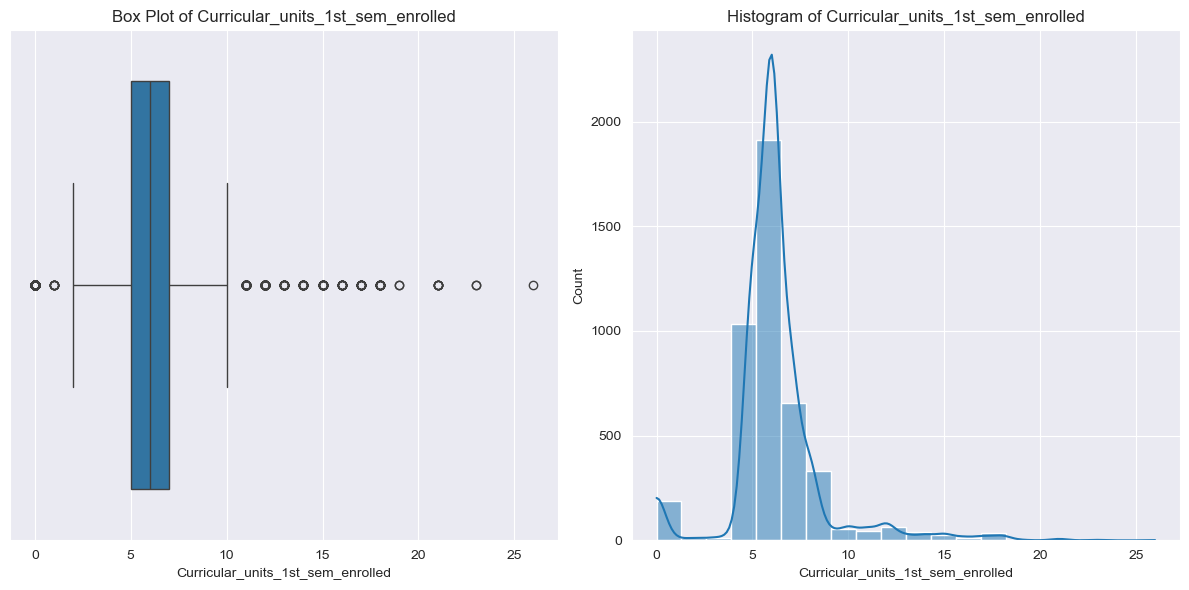

BASIC STATISTICS OF CURRICULAR UNITS 1ST SEM EVALUATIONS
Mean: 8.299050632911392
Median: 8.0
Mode: 8
σ: 4.1791055691439825
Min: 0
Max: 45
25th percentile: 6.0
50th percentile (Median): 8.0
75th percentile: 10.0


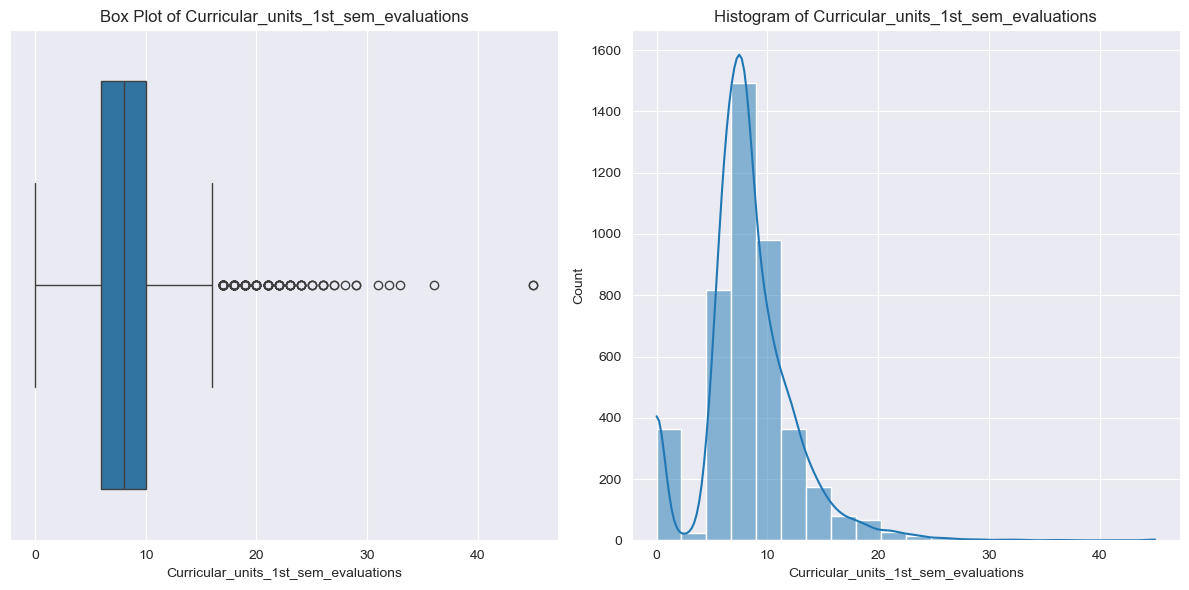

BASIC STATISTICS OF CURRICULAR UNITS 1ST SEM APPROVED
Mean: 4.706600361663653
Median: 5.0
Mode: 6
σ: 3.094237979694002
Min: 0
Max: 26
25th percentile: 3.0
50th percentile (Median): 5.0
75th percentile: 6.0


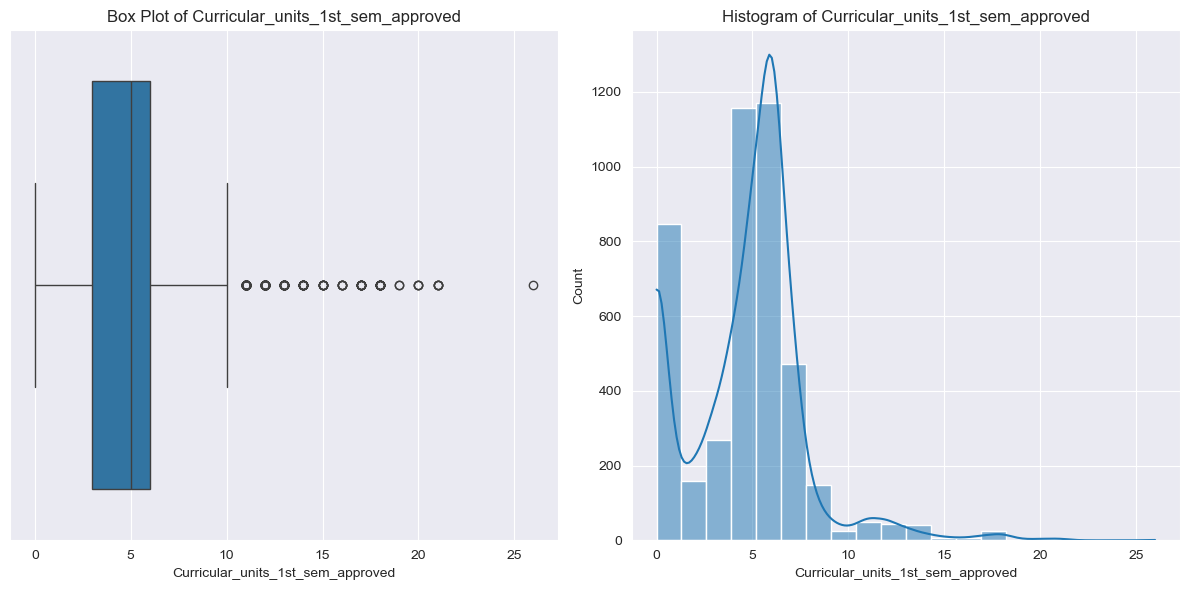

BASIC STATISTICS OF CURRICULAR UNITS 1ST SEM GRADE
Mean: 10.640821575154185
Median: 12.285714285714286
Mode: 0.0
σ: 4.843663380663773
Min: 0.0
Max: 18.875
25th percentile: 11.0
50th percentile (Median): 12.285714285714286
75th percentile: 13.4


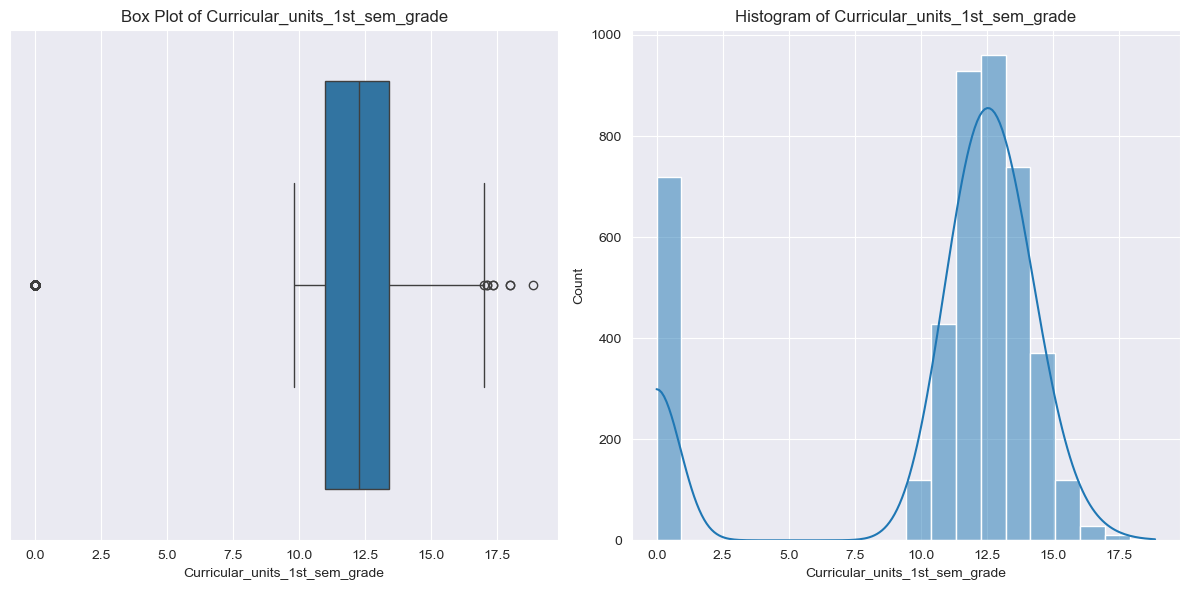

BASIC STATISTICS OF CURRICULAR UNITS 1ST SEM WITHOUT EVALUATIONS
Mean: 0.13765822784810128
Median: 0.0
Mode: 0
σ: 0.6908801837297883
Min: 0
Max: 12
25th percentile: 0.0
50th percentile (Median): 0.0
75th percentile: 0.0


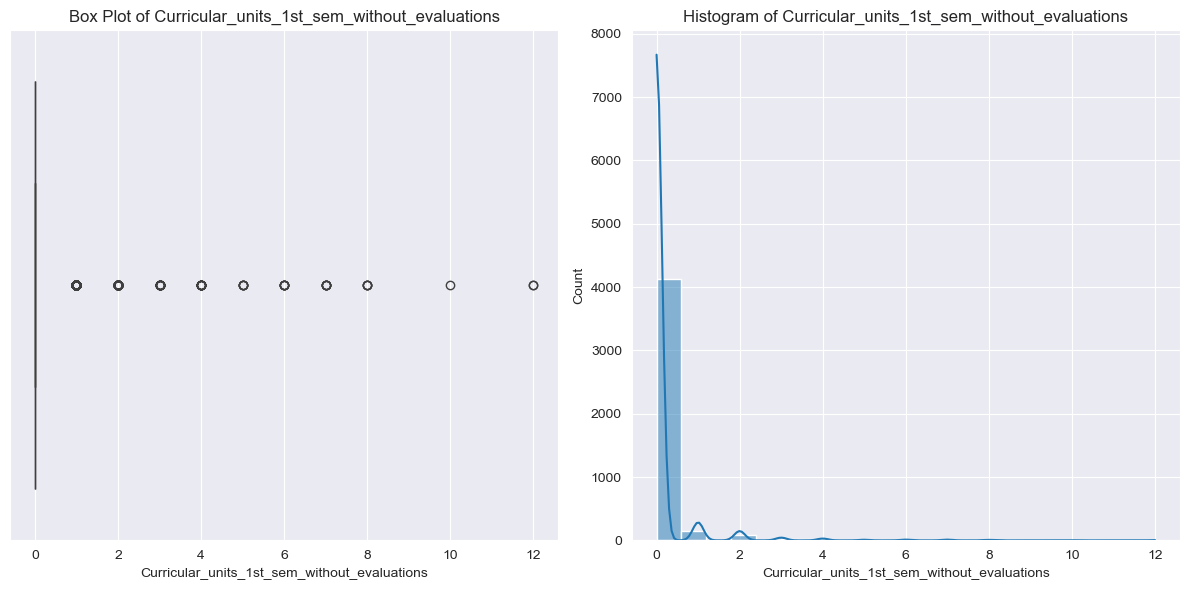

In [44]:
# List the 1st semester academic columns
column_list = [
    'Curricular_units_1st_sem_credited', 
    'Curricular_units_1st_sem_enrolled', 
    'Curricular_units_1st_sem_evaluations', 
    'Curricular_units_1st_sem_approved', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations'  
]

for column in column_list:
    get_basic_statistics(column)

## Descriptive analysis about 2nd semester academic data

This includes credited, enrolled, evaluated, not evaluated, approved, and grade units.

BASIC STATISTICS OF CURRICULAR UNITS 2ND SEM CREDITED
Mean: 0.5418173598553345
Median: 0.0
Mode: 0
σ: 1.9185461437102433
Min: 0
Max: 19
25th percentile: 0.0
50th percentile (Median): 0.0
75th percentile: 0.0


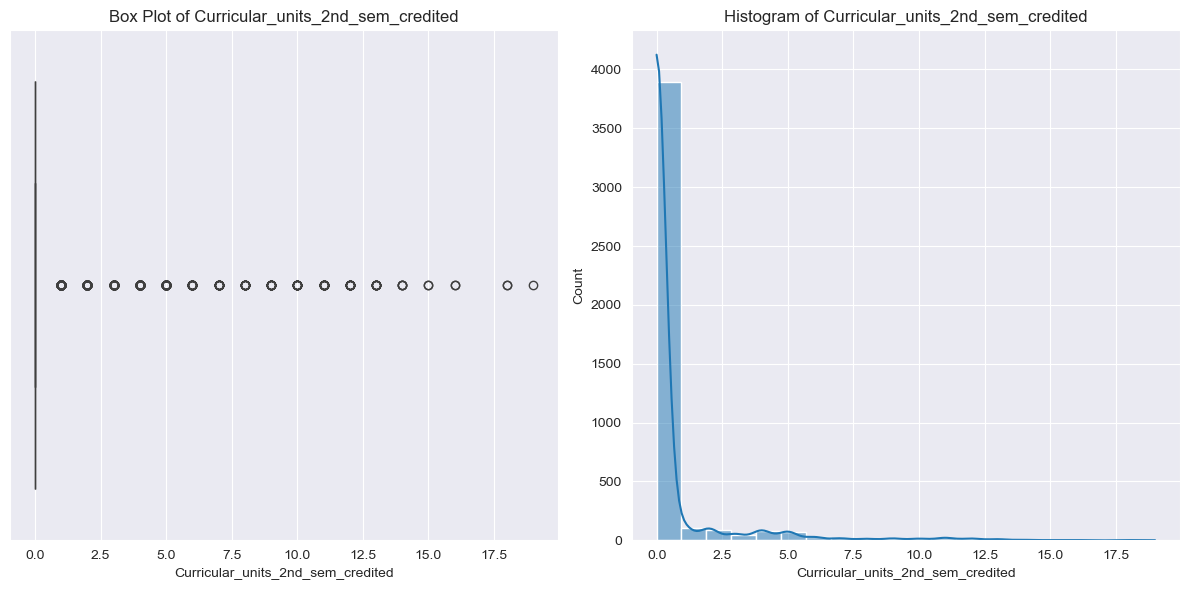

BASIC STATISTICS OF CURRICULAR UNITS 2ND SEM ENROLLED
Mean: 6.232142857142857
Median: 6.0
Mode: 6
σ: 2.195950751463278
Min: 0
Max: 23
25th percentile: 5.0
50th percentile (Median): 6.0
75th percentile: 7.0


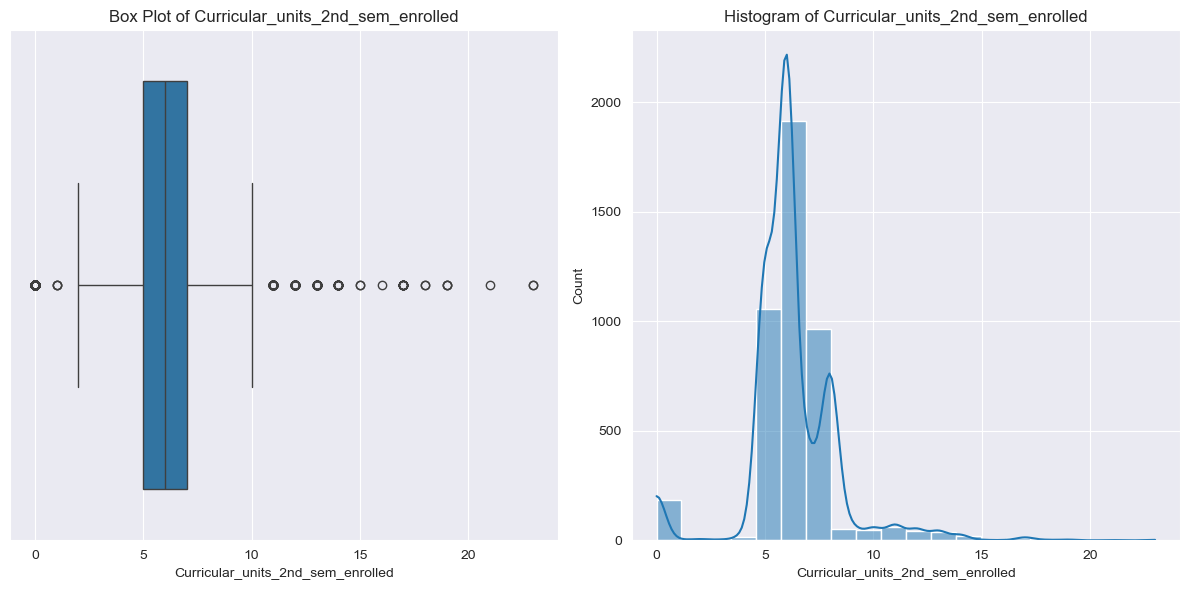

BASIC STATISTICS OF CURRICULAR UNITS 2ND SEM EVALUATIONS
Mean: 8.063291139240507
Median: 8.0
Mode: 8
σ: 3.947950941437388
Min: 0
Max: 33
25th percentile: 6.0
50th percentile (Median): 8.0
75th percentile: 10.0


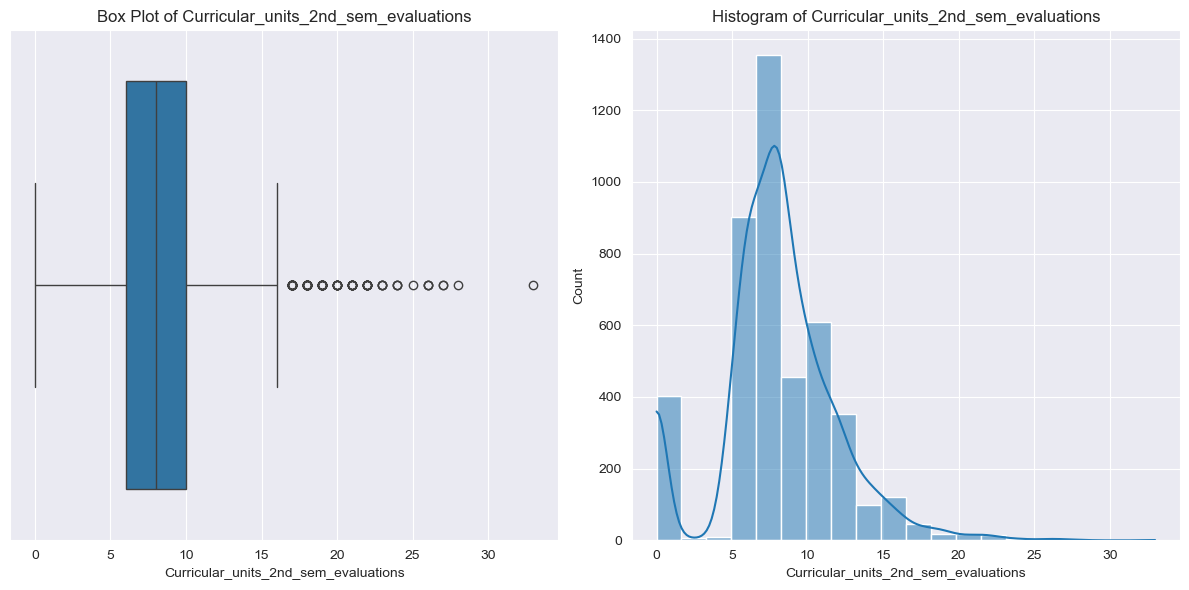

BASIC STATISTICS OF CURRICULAR UNITS 2ND SEM APPROVED
Mean: 4.435804701627487
Median: 5.0
Mode: 6
σ: 3.014763902385565
Min: 0
Max: 20
25th percentile: 2.0
50th percentile (Median): 5.0
75th percentile: 6.0


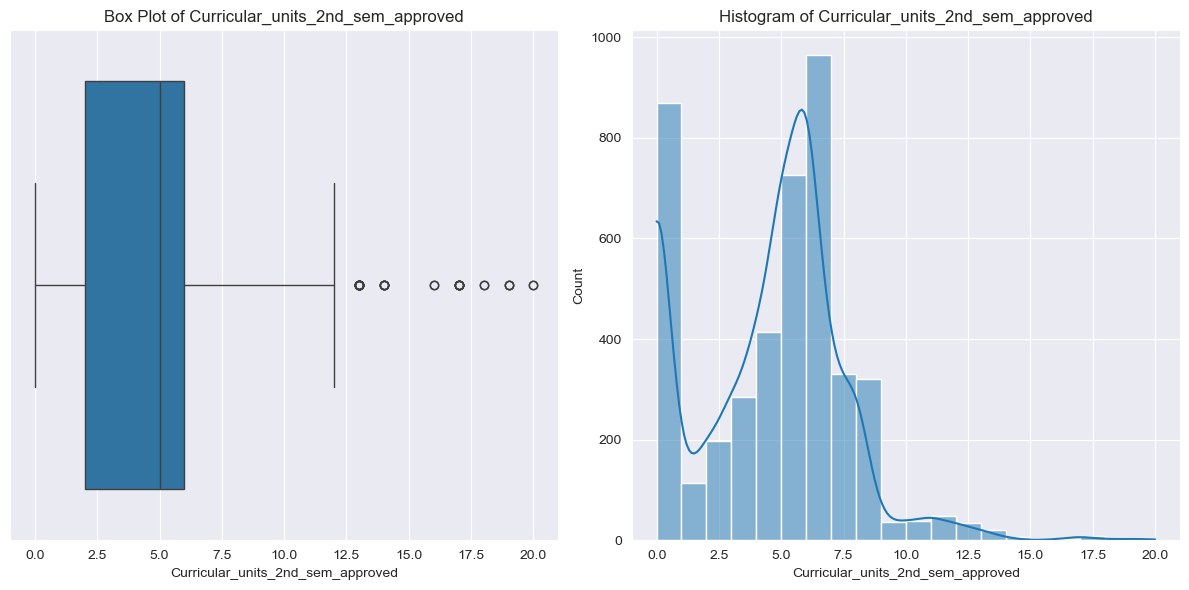

BASIC STATISTICS OF CURRICULAR UNITS 2ND SEM GRADE
Mean: 10.230205722716985
Median: 12.2
Mode: 0.0
σ: 5.210807954644242
Min: 0.0
Max: 18.571428571428573
25th percentile: 10.75
50th percentile (Median): 12.2
75th percentile: 13.333333333333334


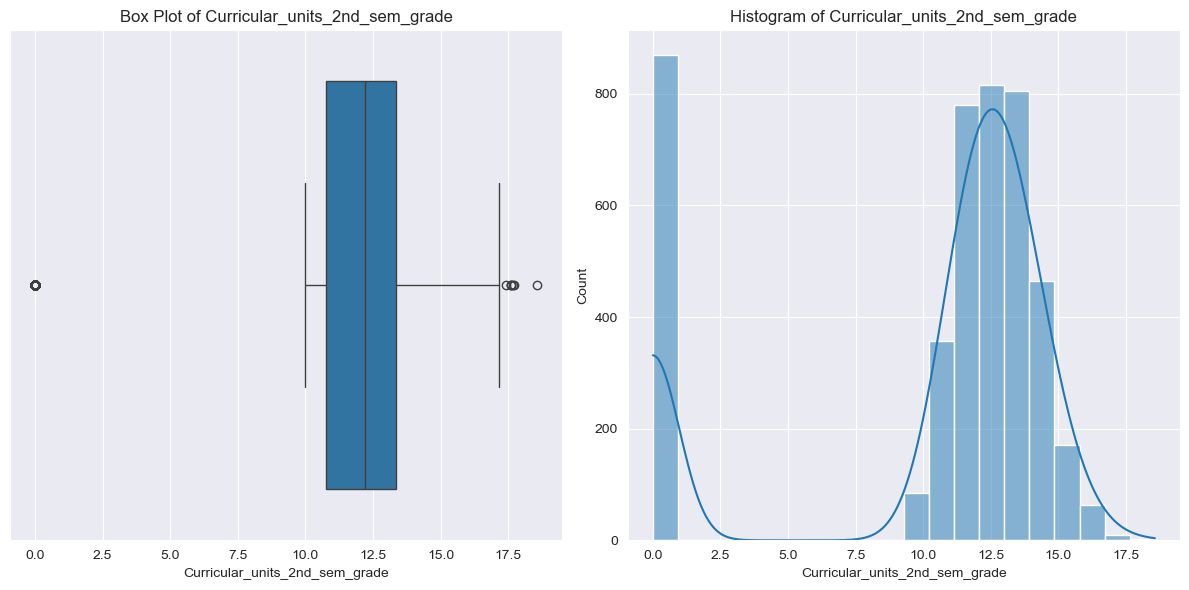

BASIC STATISTICS OF CURRICULAR UNITS 2ND SEM WITHOUT EVALUATIONS
Mean: 0.15031645569620253
Median: 0.0
Mode: 0
σ: 0.753774068513021
Min: 0
Max: 12
25th percentile: 0.0
50th percentile (Median): 0.0
75th percentile: 0.0


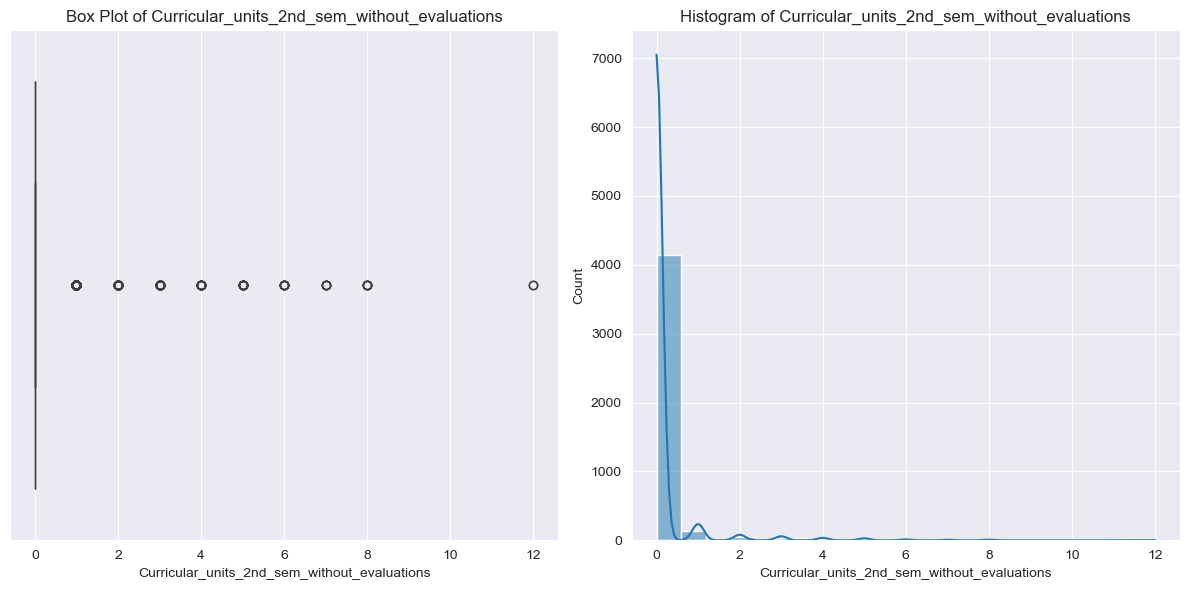

In [45]:
# List the 2nd semester academic columns
column_list = [
    'Curricular_units_2nd_sem_credited', 
    'Curricular_units_2nd_sem_enrolled', 
    'Curricular_units_2nd_sem_evaluations', 
    'Curricular_units_2nd_sem_approved', 
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'  
]

for column in column_list:
    get_basic_statistics(column)

## Descriptive analysis about target data

This only includes the target classified as either enrolled, dropped out, or graduated.

BASIC STATISTICS OF TARGET
Counts of Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


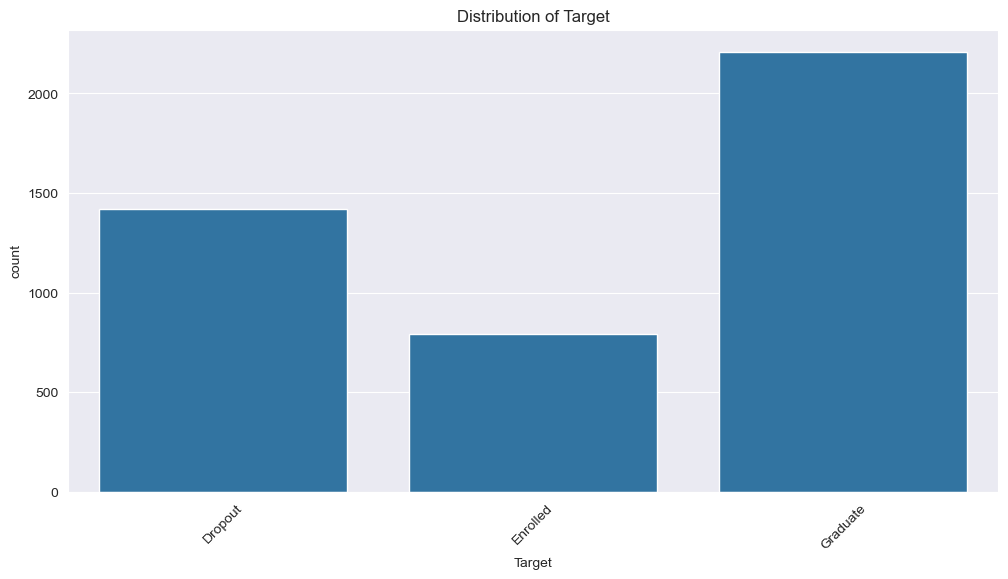

In [46]:
# List the 1st semester academic columns
get_basic_statistics('Target')